In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
ruta = r"C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv"  # Estupido windows
#ruta = r"C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv"
print(f"\nArchivo: \n {ruta}")


Archivo: 
 C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv


In [3]:
datos = pd.read_csv(ruta, header=None).values
datos.astype(float)
print(type(datos))
len(datos)

<class 'numpy.ndarray'>


62

In [4]:
#********************************************************************************************
# Inicia la función bisección
#********************************************************************************************
    
def biseccion(vector, a1, a2, b1, b2, P, m):
        
    tol = 1e-13
    gEstimados = np.zeros ((m, 1))
    
    for j in range (m):    
            
        b = 100000
        a = 0       
        fx = vector[j]
        fa = fx-((P*math.exp(-1*math.exp((b1-a)/a1))) + \
            ((1-P)*math.exp(-1*math.exp((b2-a)/a2))))
    
        for i in range (1000):  
                
            p = a + ((b - a) / 2)
            fp = fx-((P*math.exp(-1*math.exp((b1-p)/a1))) + \
                    ((1-P)*math.exp(-1*math.exp((b2-p)/a2))))      # f(p)
                
            if ((fp == 0) | (((b - a) / 2) < tol)):
                    break
            if ((fa * fp) > 0):
                a = p
                fa = fp
            if ((fa * fp) < 0):
                b = p
    
        gEstimados[j] = p                 # Datos estimados
    
    return(gEstimados)
        

In [5]:
#********************************************************************************************
# Inicia la función errorC
#********************************************************************************************
    
def errorC(m, gastos, tRpNEx, pIn):
    E1 = 0
    E = np.zeros(m)
    for i in range (m):                 # F(qMedido)
            
        E[i] = ((pIn[4]*math.exp(-1*math.exp((pIn[2]-gastos[i])/pIn[0]))) + \
        ((1-pIn[4])*math.exp(-1*math.exp((pIn[3]-gastos[i])/pIn[1]))))
        sumaC = (tRpNEx[i] - E[i])**2  # Función de errores cuadrados pesados
        E1 = E1 + sumaC
            
    return(E1)

In [6]:
    #********************************************************************************************
    # Inicia el programa
    #********************************************************************************************


m = datos.size    
    
matriz01 = np.zeros ((m, 9))
    
matriz02 = np.zeros ((m, 4)) # Aquí hay que crear la otra columna para los datos ajustados extrapolados sin rosenbrock,4 columnas, eran 3!
matriz02 [:] = -999
matriz02 [0, 0] = 2
matriz02 [1, 0] = 5
matriz02 [2, 0] = 10
matriz02 [3, 0] = 20
matriz02 [4, 0] = 50
matriz02 [5, 0] = 100
matriz02 [6, 0] = 200
matriz02 [7, 0] = 500
matriz02 [8, 0] = 1000
matriz02 [9, 0] = 2000
matriz02 [10, 0] = 5000
matriz02 [11, 0] = 10000
n = 12

EEstandart = np.full((m, 2), -999, float)    

In [7]:
for i in range (n):
    matriz02 [i ,1] = 1.0 - (1.0 / matriz02 [i, 0]) #Columna de F(x)
    
for i in range (m):
        
    matriz01 [i, 0] = i + 1           # Se crea la columna con el No de orden columna '1'
    matriz01 [i, 1] = datos.max()  # Se crea la columna con los gastos "columna 2"
    j = datos.argmax()             # registrados y ordenados
    datos [j, 0] = -1              # en orden ascendente
    matriz01 [i, 2] = (m + 1) / matriz01 [i, 0]  # Se crea la columna con Tr "columna 3"
    matriz01 [i, 3] = 1 - (1 / matriz01 [i, 2])  # Se crea la columna de F(x), "a partir de Tr (columna 4)"
    matriz01 [i, 4] = 1 / matriz01[i, 2] # F(qEmpirico)=k/n+1

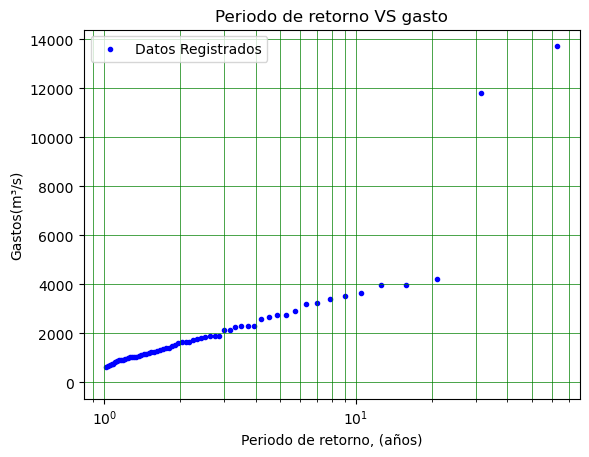

Número de datos de origen ciclonico
 (debe de ser mayor a 1):  2


In [8]:
#********************************************************************************************
# Se decide cuantos valores son los ciclonicos
#********************************************************************************************
    
tR = matriz01 [:, 2]
dReg = matriz01 [:, 1]
    
pl.subplot(1, 1, 1)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.', color='b')
pl.legend(loc="best")
pl.title("Periodo de retorno VS gasto")
pl.ylabel("Gastos(m³/s)")
pl.xlabel("Periodo de retorno, (años)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
pl.show()
ndc = int(input("Número de datos de origen ciclonico\n (debe de ser mayor a 1): "))

In [9]:
#********************************************************************************************
# estimación de párametros
#********************************************************************************************
    
media1 = 0
media2 = 0
foo = 0
ds1 = 0
ds2 = 0
P = (m - ndc) / m                   # Estimación probabilidad
    
for i in range (ndc):               # Estimación media2
    media2 = media2 + matriz01[i, 1]
        
media2 = media2 / ndc
    
for i in range (ndc):
        
    foo = (matriz01[i, 1] - media2) ** 2
    ds2 = ds2 + foo
        
ds2 = (ds2/(ndc-1)) ** 0.5          # Estimación desviación estandart 2
foo = 0
    
for i in range (m - ndc):           # Estimación media1
    media1 = media1 + matriz01[i + ndc, 1]
        
media1 = media1 / (m-ndc)
    
for i in range (m - ndc):
        
    foo = (matriz01[i + ndc, 1] - media1) ** 2
    ds1 = ds1 + foo
        
ds1 = (ds1/((m-ndc) - 1)) ** 0.5    # Estimación desviación estandart 1
a1 = ((6)**0.5/math.pi) * ds1
a2 = ((6)**0.5/math.pi) * ds2
b1 = media1 - (0.5772 * a1)
b2 = media2 - (0.5772 * a2)
    
                    # Se imprimen los parametros iniciales
    
print("\x1b[1;31;m" + "\n             Parametros Iniciales")
print("\x1b[1;32;m" + "\nmedia 1:", "\x1b[1;35;m", media1)
print("\x1b[1;32;m" + "desviación estandart 1: ", "\x1b[1;35;m",ds1)
print("\x1b[1;32;m" + "\nmedia 2: ", "\x1b[1;35;m", media2)
print("\x1b[1;32;m" + "desviación estantart 2: ", "\x1b[1;35;m",ds2)
print("\x1b[1;32;m" + "\na1: ", "\x1b[1;35;m",a1)
print("\x1b[1;32;m" + "b1: ", "\x1b[1;35;m",b1)
print("\x1b[1;32;m" + "a2: ", "\x1b[1;35;m",a2)
print("\x1b[1;32;m" + "b2: ", "\x1b[1;35;m",b2, "\n")
print("\x1b[1;32;m" + "Probabilidad: ", "\x1b[1;35;m",P, "\n")
    
gEstimados = biseccion(matriz01[:, 3], a1, a2, b1, b2, P, m) # Se invoca a la función "bisección", para obtener los gastos estimados.
matriz01[:, 7] = gEstimados[:, 0]

gEstimados = biseccion(matriz02[:, 1], a1, a2, b1, b2, P, m) # Se invoca a la función "bisección", para obtener los gastos extrapolados.
matriz02[:12, -1] = gEstimados[0:12, 0]
    
E = 0
    
for i in range (m): 
                # F(qMedido)
    matriz01[i, 5] = ((P*math.exp(-1*math.exp((b1-matriz01[i, 1])/a1))) + \
                      ((1-P)*math.exp(-1*math.exp((b2-matriz01[i, 1])/a2))))
    matriz01[i, 6] = (matriz01[i, 3] - matriz01[i, 5])**2  # Función de errores cuadrados pesados
    E = E + matriz01[i, 6]
        
print("\x1b[1;32;m" + "E = ", "\x1b[1;35;m", E)


             Parametros Iniciales

media 1:  1795.35
desviación estandart 1:   940.3031394543974

media 2:   12756.5
desviación estantart 2:   1352.6952724098653

a1:   733.1513500225768
b1:   1372.1750407669686
a2:   1054.692176941888
b2:   12147.731675469142 

Probabilidad:   0.967741935483871 

E =   0.08915500279660643


In [10]:
print(matriz02[:,-1])

[ 1676.41389128  2588.378707    3295.3733502   4297.30003338
 12182.52092547 13193.34636361 14026.46450447 15046.86202572
 15794.92775285 16534.31959339 17505.67265994 18238.37032781
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.          -999.          -999.
  -999.          -999.        ]


In [11]:
#********************************************************************************************

                    # Algoritmo de Rosenbrock

#********************************************************************************************
''' 
                Condiciones iniciales del algoritmo de Rosenbrock
'''             
#********************************************************************************************
    
pIn0 = np.array([a1, a2, b1, b2, P])
pIn = np.array([a1, a2, b1, b2, P])    # punto inicial
nVec = 5                               # Número de vectores
da1 = np.array([1, 0, 0, 0, 0])        # Vectores dirección
da2 = np.array([0, 1, 0, 0, 0])
db1 = np.array([0, 0, 1, 0, 0])
db2 = np.array([0, 0, 0, 1, 0])
dP = np.array([0, 0, 0, 0, 1])

delta1 = 0.01  #3 Tamaño de paso
delta2 = 0.01
delta3 = 0.01
delta4 = 0.01
delta5 = 0.01
    
foo = np.array([0, 0, 0, 0, 0])
pIn1 = np.array([0, 0, 0, 0, 0])

#k = 1
redireccion = 0
i = 0

In [12]:
#********************************************************************************************
# Inicia el algoritmo
#********************************************************************************************
    
while True:
        
    i += 1
    print ("\x1b[1;36;m" + "\ni = ", i)
        
    for j in range (nVec):
            
        if (j == 0):              # Para el vector d1
                
            foo = delta1 * da1
            pIn1 = pIn + foo
            E1 = errorC(m, matriz01[:, 1], matriz01[:, 3], pIn1)
            print("\x1b[1;35;m" + "j=1")
            print ("f(yi + Djdj)=", E1)
                
            if (E1<E):
                    
                print("\x1b[1;32;m" + "Exito")
                delta1 = delta1 * 2
                print ("\x1b[1;35;m" + "D1 =", delta1)
                pIn = pIn1
                E = E1
                j1 = 1
                    
            else:
                    
                print("\x1b[1;31;m" + "Fracaso")
                delta1 = delta1 * (-0.5)
                print ("\x1b[1;35;m" + "D1 =", delta1)
                j1 = 0
                    
        elif (j == 1):                     # Para el vector d2
                
            foo = delta2 * da2
            pIn1 = pIn + foo
            E1 = errorC(m, matriz01[:, 1], matriz01[:, 3], pIn1)
            print("\nj=2")
            print ("f(yi + Djdj)=", E1)
                
            if (E1<E):
                    
                print("\x1b[1;32;m" + "Exito")
                delta2 = delta2 * 2
                print ("\x1b[1;35;m" + "D2 =", delta2)
                pIn = pIn1
                E = E1
                j2 = 1
                    
            else:
                    
                print("\x1b[1;31;m" + "Fracaso")
                delta2 = delta2 * (-0.5)
                print ("\x1b[1;35;m" + "D2 =", delta2, "\n")
                j2 = 0
                    
        elif (j == 2):                     # Para el vector d3
                
            foo = delta3 * db1
            pIn1 = pIn + foo
            E1 = errorC(m, matriz01[:, 1], matriz01[:, 3], pIn1)
            print("\nj=3")
            print ("f(yi + Djdj)=", E1)
            
            if (E1<E):
                    
                print("\x1b[1;32;m" + "Exito")
                delta3 = delta3 * 2
                print ("\x1b[1;35;m" + "D3 =", delta3)
                pIn = pIn1
                E = E1
                j3 = 1
                    
            else:
                    
                print("\x1b[1;31;m" + "Fracaso")
                delta3 = delta3 * (-0.5)
                print ("\x1b[1;35;m" + "D3 =", delta3, "\n")
                j3 = 0
            
        elif (j == 3):                     # Para el vector d4
                
            foo = delta4 * db2
            pIn1 = pIn + foo
            E1 = errorC(m, matriz01[:, 1], matriz01[:, 3], pIn1)
            print("\nj=4")
            print ("f(yi + Djdj)=", E1)
                
            if (E1<E):
                    
                print("\x1b[1;32;m" + "Exito")
                delta4 = delta4 * 2
                print ("\x1b[1;35;m" + "D4 =", delta4)
                pIn = pIn1
                E = E1
                j4 = 1
                    
            else:
                    
                print("\x1b[1;31;m" + "Fracaso")
                delta4 = delta4 * (-0.5)
                print ("\x1b[1;35;m" + "D4 =", delta4, "\n")
                j4 = 0
            
        else:
                
            foo = delta5 * dP              # Para el vector d5
            pIn1 = pIn + foo
            E1 = errorC(m, matriz01[:, 1], matriz01[:, 3], pIn1)
            print("\nj=5")
            print ("f(yi + Djdj)=", E1)
                
            if (E1<E):
                    
                print("\x1b[1;32;m" + "Exito")
                delta5 = delta5 * 2
                print ("\x1b[1;35;m" + "D5 =", delta5)
                pIn = pIn1
                E = E1
                j5 = 1
                    
            else:                          
                    
                print("\x1b[1;31;m" + "Fracaso")
                delta5 = delta5 * (-0.5)
                print ("\x1b[1;35;m" + "D5 =", delta5, "\n")
                j5 = 0    
                    
    if (i == 100):
        break
    if (E < 0.055):               # condición de paro
            
        print ("\x1b[1;36;m" + "<==========================================================================>")
        print("Termina la búsqueda\n")
        print("f(x1,x2) = ", E)
        print("En la coordenada: ", pIn)
        print("Número final de redirecciones: ", redireccion)
        print ("<==========================================================================>")
        break

#******************************************************************************************
# Comienza una redirección
#******************************************************************************************
    
    if (j1 == 0) and (j2 == 0) and (j3 == 0) and (j4 == 0) and (j5 == 0):   # Comienza una nueva redirección.
            
        redireccion += 1 
        print ("<============================================================>")
        delta1 = 0.01
        delta2 = 0.01
        delta3 = 0.01
        delta4 = 0.01
        delta5 = 0.01
        print("Comienza una redirección")
        print ("redirección No: " + "\x1b[1;36;m", redireccion )
        print("\x1b[1;35;m" + "Punto actual: ", pIn)
        recorrido = pIn - pIn0
        matriz = np.array([[da1[0], da2[0], db1[0], db2[0], dP[0]], \
                            [da1[1], da2[1], db1[1], db2[1], dP[1]], \
                            [da1[2], da2[2], db1[2], db2[2], dP[2]], \
                            [da1[3], da2[3], db1[3], db2[3], dP[3]], \
                            [da1[4], da2[4], db1[4], db2[4], dP[4]]])
        lambdai = np.linalg.solve(matriz, recorrido)
        print ("Lambda: ", lambdai)
        di = np.array([da1, da2, db1, db2, dP])
            
        for j in range (5):
                
            a = np.array([0, 0, 0, 0, 0])
                
            if (lambdai[j] == 0):           # para lambda1[j] = 0
                a = di[0, :]
            else:                           # Para lambdaj != 0
                    
                for p in range (j, nVec):   # Se obtiene aj
                    #print("\nj: ", j)
                    #print ("p: ", p)
                    foo = lambdai[p] * di[p] 
                    a = a + foo
                    #print ('a:', a, "\n<=============================================>")
                        
            if (j == 0):                    # Vector da1
                    
                bj1 = a
                norma = np.linalg.norm(bj1)
                da1 = bj1 / norma
                    
            elif (j == 1):                  # Vector da2
                    
                bj2 = a - ((np.dot(a, da1)) * da1)
                norma = np.linalg.norm(bj2)
                da2 = bj2 / norma

            elif (j == 2):                  # Vector db1
                    
                bj3 = a - (((np.dot(a, da1)) * da1) + ((np.dot(a, da2)) * da2))
                norma = np.linalg.norm(bj3)
                db1 = bj3 / norma
                    
            elif (j == 3):                  # Vector db2
                    
                bj4 = a - (((np.dot(a, da1)) * da1) + ((np.dot(a, da2)) * da2) + \
                           ((np.dot(a, db1)) * db1))
                norma = np.linalg.norm(bj4)
                db2 = bj4 / norma
                    
            else:                           # Vector dP
                    
                bj5 = a - (((np.dot(a, da1)) * da1) + ((np.dot(a, da2)) * da2) + \
                           ((np.dot(a, db1)) * db1) + ((np.dot(a, db2)) * db2))
                norma = np.linalg.norm(bj5)
                dP = bj4 / norma
                print ("\x1b[1;35;m" + "Nuevos vectores: \nd1 = ", da1, "\nd2 = ", da2)
                print ("d3 = ", db1, "\nd4 = ", db2, "\nd5 = ", dP)
            
    print ("\nPunto actual: ", pIn)        
    print ("\n<===================================================================>")


i =  1
j=1
f(yi + Djdj)= 0.08915429157477132
Exito
D1 = 0.02

j=2
f(yi + Djdj)= 0.08915429056896702
Exito
D2 = 0.02

j=3
f(yi + Djdj)= 0.08916426652525515
Fracaso
D3 = -0.005 


j=4
f(yi + Djdj)= 0.08915428794579207
Exito
D4 = 0.02

j=5
f(yi + Djdj)= 0.08835405073047667
Exito
D5 = 0.02

Punto actual:  [7.33161350e+02 1.05470218e+03 1.37217504e+03 1.21477417e+04
 9.77741935e-01]

<===================================================================>

i =  2
j=1
f(yi + Djdj)= 0.08835059545817117
Exito
D1 = 0.04

j=2
f(yi + Djdj)= 0.08835059433453923
Exito
D2 = 0.04

j=3
f(yi + Djdj)= 0.08834638138060907
Exito
D3 = -0.01

j=4
f(yi + Djdj)= 0.08834637525660634
Exito
D4 = 0.04

j=5
f(yi + Djdj)= 0.09878032509829296
Fracaso
D5 = -0.01 


Punto actual:  [7.33181350e+02 1.05472218e+03 1.37217004e+03 1.21477617e+04
 9.77741935e-01]

<===================================================================>

i =  3
j=1
f(yi + Djdj)= 0.08833947241186839
Exito
D1 = 0.08

j=2
f(yi + Djdj)= 0.08833947016

In [17]:
#******************************************************************************************
# Ajuste de la función con los parametros optimizados y errores cuadráticos mínimos
#******************************************************************************************
    
a1 = pIn[0]; a2 = pIn[1]; b1 = pIn[2]; b2 = pIn[3]; P = pIn[4]
gEstimados = biseccion(matriz01[:, 3], a1, a2, b1, b2, P, m) # Se invoca a la función "bisección" para los datos optimizados.
matriz01[:, 8] = gEstimados[:, 0]
gEstimados1 = biseccion(matriz02[:, 1], a1, a2, b1, b2, P, n) # Se invoca a la función bisección para los datos extrapolados optimizados
matriz02[:12, 2] = gEstimados1[:, 0]
    
foo0 = 0.0
foo1 = 0.0
EE0 = 0.0
EE1 = 0.0
    
for j in range (len(matriz01)): # Error cuadrático mínimo
        
    foo0 = (matriz01[j, 1] - matriz01[j, 7]) ** 2
    foo1 = (matriz01[j, 1] - matriz01[j, 8]) ** 2
    EE0 = EE0 + foo0
    EE1 = EE1 + foo1
    
EE0 = (EE0 / (m - 5)) ** 0.5 # error, tenía un 58, que debería ser m
EE1 = (EE1 / (m - 5)) ** 0.5 # error, tenía un 58, que debería ser m
    
print ("Función Doble Gumbel, error cuadrático mínimo (Sin Optimizar): ", EE0)
print ("Función Doble Gumbel, error cuadrático mínimo (Optimizado): ", EE1)
EEstandart[0, 0] = EE0
EEstandart[0, 1] = EE1

Función Doble Gumbel, error cuadrático mínimo (Sin Optimizar):  268.6279838304303
Función Doble Gumbel, error cuadrático mínimo (Optimizado):  290.8591109834111


In [18]:
#******************************************************************************************
# Salidas
# Se crea el Data Frame que servirá de salida a una sheet de excel
#******************************************************************************************
    
columnas = ['No Orden', 'Gastos Registrados', 'Tr (Annios)', 'F(x)', 'F(qEmpirico)=k/n+1',\
            'F(qMedido)', 'Función de errores cuadrados pesados', 'Gastos estimados',\
            'Gastos estimados optimizados (Rosenbrock)']
cD = pd.DataFrame(matriz01, columns = columnas)
    
cD.insert(9, 'Tr', matriz02 [:, 0])
cD.insert(10, 'F(X)', matriz02 [:, 1])
cD.insert(11, 'Valor Extrapolado (sin optimizar)', matriz02 [:, 3])
cD.insert(12, 'Valor Extrapolado (Rosenbrock)', matriz02 [:, 2])
cD.insert(13, 'Error Estandart "sin optimizar"', EEstandart[:, 0])
cD.insert(14, 'Error Estandart "algoritmo de Rosenbrock"', EEstandart[:, 1])

In [19]:
cD.head(13)

,No Orden,Gastos Registrados,Tr (Annios),F(x),F(qEmpirico)=k/n+1,F(qMedido),Función de errores cuadrados pesados,Gastos estimados,Gastos estimados optimizados (Rosenbrock),Tr,F(X),Valor Extrapolado (sin optimizar),Valor Extrapolado (Rosenbrock),"Error Estandart ""sin optimizar""","Error Estandart ""algoritmo de Rosenbrock"""
0,1.0,13713.0,63.000000,0.984127,0.015873,0.993457,0.000087,12558.550819,14800.272816,2.0,0.5000,1676.413891,1624.617201,268.627984,290.859111
1,2.0,11800.0,31.500000,0.968254,0.031746,0.975772,0.000057,10650.068976,12832.462508,5.0,0.8000,2588.378707,2574.715664,-999.000000,-999.000000
2,3.0,4235.0,21.000000,0.952381,0.047619,0.948442,0.000016,4403.862343,5402.209141,10.0,0.9000,3295.373350,3370.715170,-999.000000,-999.000000
3,4.0,3992.0,15.750000,0.936508,0.063492,0.940964,0.000020,3877.426050,4161.091544,20.0,0.9500,4297.300033,5031.217173,-999.000000,-999.000000
4,5.0,3979.0,12.600000,0.920635,0.079365,0.940491,0.000394,3569.940160,3716.956168,50.0,0.9800,12182.520925,14231.407891,-999.000000,-999.000000
5,6.0,3662.0,10.500000,0.904762,0.095238,0.926072,0.000454,3350.722973,3437.989953,100.0,0.9900,13193.346364,15833.444583,-999.000000,-999.000000
6,7.0,3533.0,9.000000,0.888889,0.111111,0.918264,0.000863,3179.527927,3233.086245,200.0,0.9950,14026.464504,17256.895236,-999.000000,-999.000000
7,8.0,3388.0,7.875000,0.873016,0.126984,0.907785,0.001209,3038.563928,3070.407906,500.0,0.9980,15046.862026,19042.422492,-999.000000,-999.000000
8,9.0,3245.0,7.000000,0.857143,0.142857,0.895367,0.001461,2918.381621,2935.036437,1000.0,0.9990,15794.927753,20363.229503,-999.000000,-999.000000
9,10.0,3205.0,6.300000,0.841270,0.158730,0.891472,0.002520,2813.355890,2818.769017,2000.0,0.9995,16534.319593,21672.912163,-999.000000,-999.000000


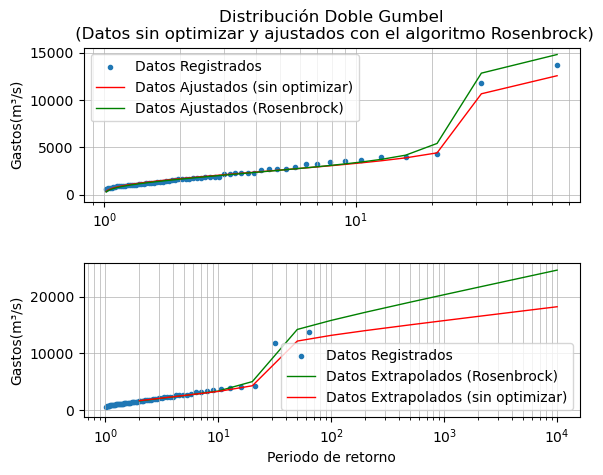

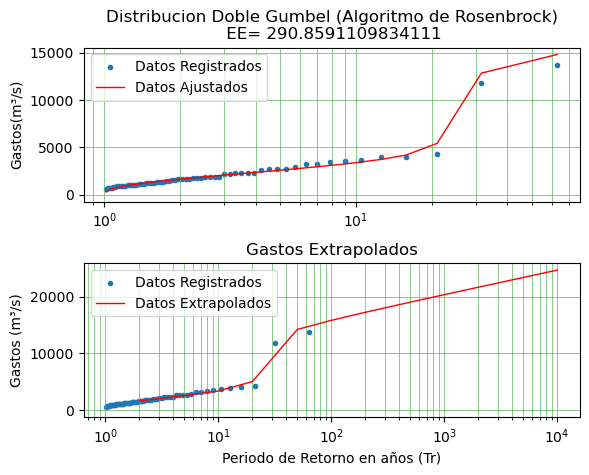

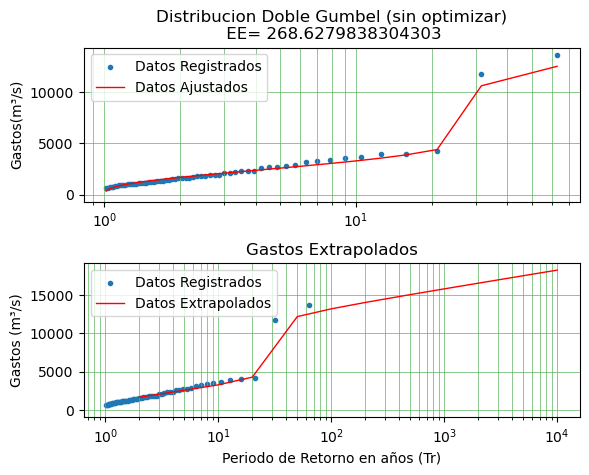

In [20]:
#******************************************************************************************
# Graficos
#******************************************************************************************

titulo0 = "Distribucion Doble Gumbel (sin optimizar)\n EE= " + str(EE0)
titulo1 = "Distribucion Doble Gumbel (Algoritmo de Rosenbrock)\n EE= " + str(EE1)

tR = matriz01 [:, 2]
dReg = matriz01 [:, 1]
dAjust = matriz01 [:, 7] # Gastos estimados
dAjust1 = matriz01 [:, 8] # Gastos estimados por Rosenbrock
dTrExtrap = matriz02 [:12, 0] # Periodos de retorno
dExtrap_sr = matriz02 [:12, 3] # Datos extrapolados sin Rosenbrock
dExtrap = matriz02 [:12, 2] # Datos extrapolados Rosenbrock

##################################################################################################################
# Gráfico comparación
###################################################################################################################
    
pl.subplot(2, 1, 1)
pl.subplots_adjust(hspace=0.4)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjust, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados (sin optimizar)")
pl.plot(tR, dAjust1, color="g", linewidth="1.0", linestyle="-", label ="Datos Ajustados (Rosenbrock)")
pl.legend(loc="best")
pl.title("Distribución Doble Gumbel\n (Datos sin optimizar y ajustados con el algoritmo Rosenbrock)")
pl.ylabel("Gastos(m³/s)")
#pl.xlabel("Periodo de retorno") 
pl.semilogx(True)
pl.grid(True, which='both', color='#b1b1b1', linestyle='-', linewidth=0.5)
    
pl.subplot(2, 1, 2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrap, color="g", linewidth="1.0", linestyle="-", label ="Datos Extrapolados (Rosenbrock)")
pl.plot(dTrExtrap, dExtrap_sr, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados (sin optimizar)")
pl.legend(loc="best")
#pl.title(titulo1)
pl.ylabel("Gastos(m³/s)")
pl.xlabel("Periodo de retorno") 
pl.semilogx(True)
pl.grid(True, which='both', color='#b1b1b1', linestyle='-', linewidth=0.5)
#pl.savefig("salidas/DistribucionDGumbelRosen0.png", dpi=1200)
pl.show()

##################################################################################################################
# Gráfico optimización Rosenbrock
###################################################################################################################

pl.subplot(2, 1, 1)
pl.subplots_adjust(hspace=0.4)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjust1, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="best")
pl.title(titulo1)
pl.ylabel("Gastos(m³/s)")
#pl.xlabel("Periodo de retorno") 
pl.semilogx(True)
pl.grid(True, which='both', color='#5ab45f', linestyle='-', linewidth=0.5)

pl.subplot(2, 1, 2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
#pl.scatter(dTrExtrap, dExtrap, label='Datos Extrapolados', marker='.', color='r')
pl.plot(dTrExtrap, dExtrap, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="best")
pl.title("Gastos Extrapolados")
pl.ylabel("Gastos (m³/s)")
pl.xlabel("Periodo de Retorno en años (Tr)")
pl.semilogx(True)
pl.grid(True, which='both', color='#5ab45f', linestyle='-', linewidth=0.5)
pl.show()

##################################################################################################################
# Gráfico estimados sin optimizar
###################################################################################################################

pl.subplot(2, 1, 1)
pl.subplots_adjust(hspace=0.4)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjust, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="best")
pl.title(titulo0)
pl.ylabel("Gastos(m³/s)")
#pl.xlabel("Periodo de retorno") 
pl.semilogx(True)
pl.grid(True, which='both', color='#5ab45f', linestyle='-', linewidth=0.5)

pl.subplot(2, 1, 2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
#pl.scatter(dTrExtrap, dExtrap, label='Datos Extrapolados', marker='.', color='r')
pl.plot(dTrExtrap, dExtrap_sr, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="best")
pl.title("Gastos Extrapolados")
pl.ylabel("Gastos (m³/s)")
pl.xlabel("Periodo de Retorno en años (Tr)")
pl.semilogx(True)
pl.grid(True, which='both', color='#5ab45f', linestyle='-', linewidth=0.5)

#pl.savefig("salidas/DistribucionDGumbelRosen1.png", dpi=1200)
pl.show()

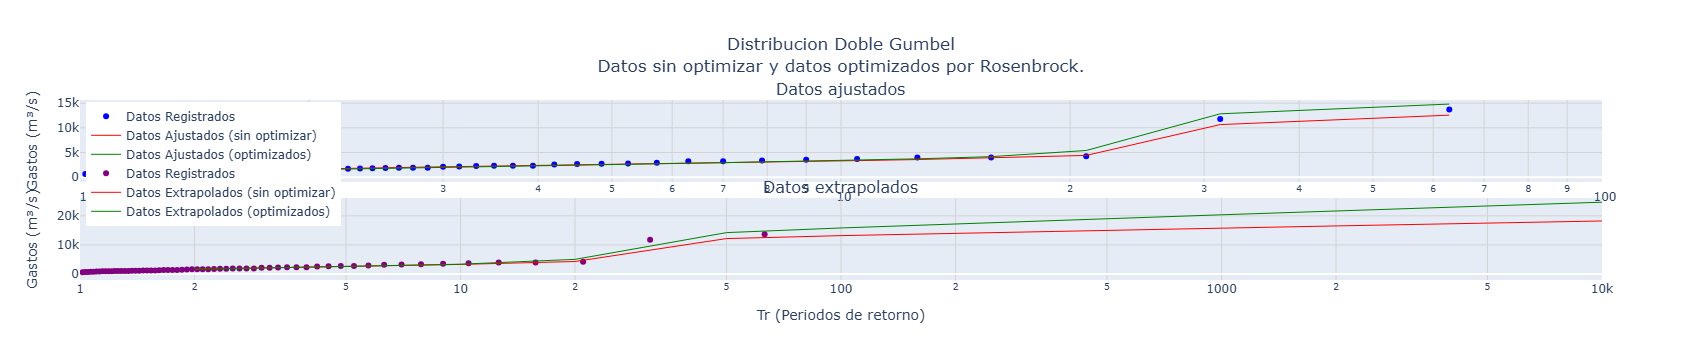

In [31]:
# Gráficos html, datos sin optimizar y optimizados
# Crear subplots
titulo0 = "Distribucion Doble Gumbel<br>Datos sin optimizar y datos optimizados por Rosenbrock."
#titulo1 = "Distribucion Gumbel (Momentos-L). EE= " + str(EEMomL)
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.09, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))
# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjust, 
                         mode='lines', 
                         name='Datos Ajustados (sin optimizar)', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjust1, 
                         mode='lines', 
                         name='Datos Ajustados (optimizados)',
                         line=dict(color='green', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrap_sr, 
                         mode='lines', 
                         name='Datos Extrapolados (sin optimizar)', 
                         line=dict(color='red', 
                         width=1)), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrap, 
                         mode='lines', 
                         name='Datos Extrapolados (optimizados)', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text=titulo0,
    title_x=0.5,  # Centra el título
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99))

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

fig.show()

In [32]:
fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly_dgumbe0.html')

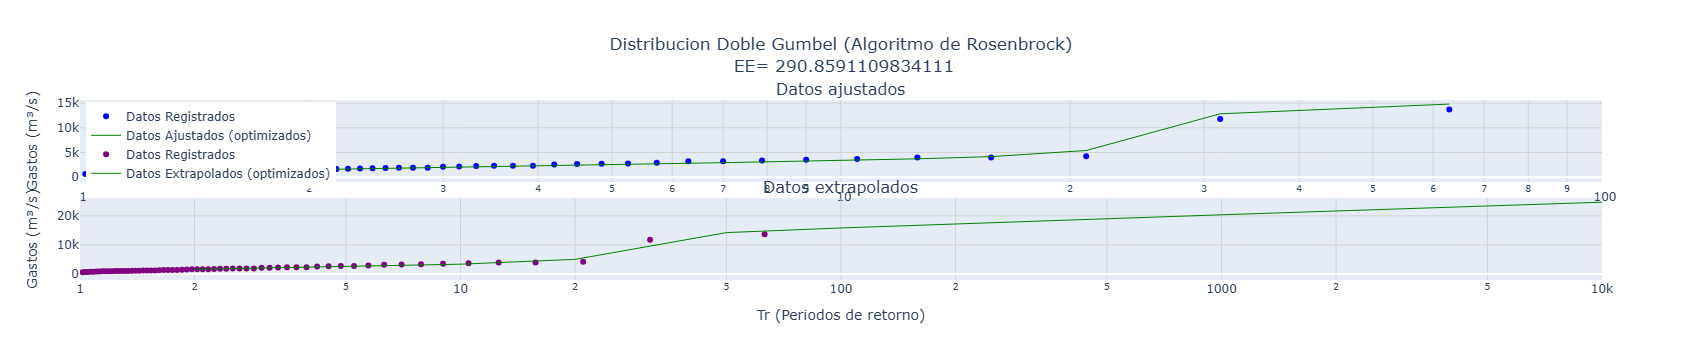

In [37]:
#titulo0 = "Distribucion Doble Gumbel (sin optimizar)\n EE= " + str(EE0)
titulo1 = "Distribucion Doble Gumbel (Algoritmo de Rosenbrock)<br> EE= " + str(EE1)
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.09, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))
# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)
"""
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjust, 
                         mode='lines', 
                         name='Datos Ajustados (sin optimizar)', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)"""
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjust1, 
                         mode='lines', 
                         name='Datos Ajustados (optimizados)',
                         line=dict(color='green', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)
"""
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrap_sr, 
                         mode='lines', 
                         name='Datos Extrapolados (sin optimizar)', 
                         line=dict(color='red', 
                         width=1)), 
              row=2, col=1)"""
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrap, 
                         mode='lines', 
                         name='Datos Extrapolados (optimizados)', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text=titulo1,
    title_x=0.5,  # Centra el título
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99))

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

fig.show()

In [35]:
fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly_dgumbel01.html')

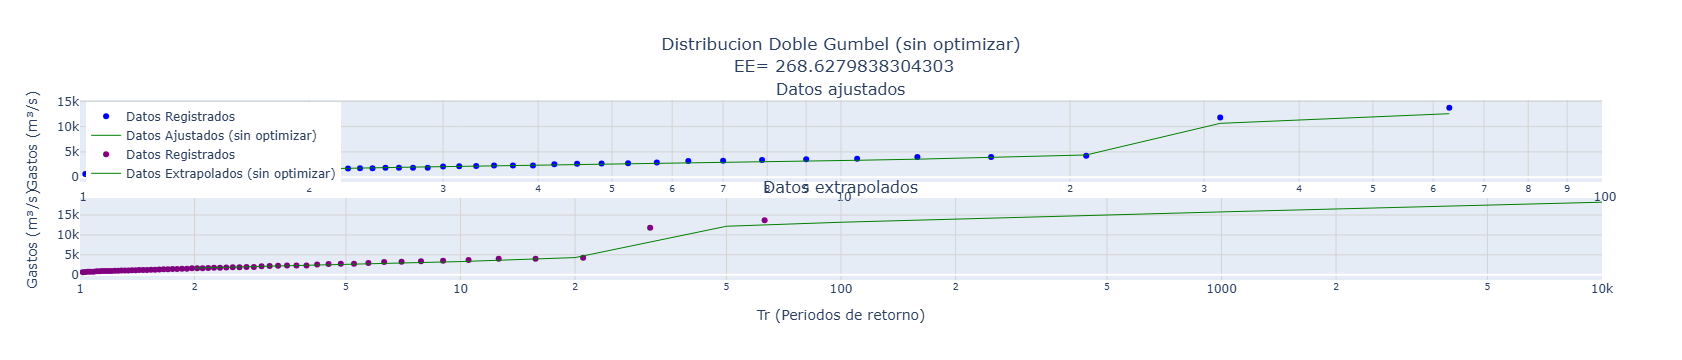

In [42]:
titulo0 = "Distribucion Doble Gumbel (sin optimizar)<br> EE= " + str(EE0)
#titulo1 = "Distribucion Doble Gumbel (Algoritmo de Rosenbrock)<br> EE= " + str(EE1)
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.09, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))
# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dAjust, 
                         mode='lines', 
                         name='Datos Ajustados (sin optimizar)', 
                         line=dict(color='green', width=1)), 
              row=1, col=1)
"""
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjust1, 
                         mode='lines', 
                         name='Datos Ajustados (optimizados)',
                         line=dict(color='green', width=1)), 
              row=1, col=1)
"""
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)

fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrap_sr, 
                         mode='lines', 
                         name='Datos Extrapolados (sin optimizar)', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)
"""
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrap, 
                         mode='lines', 
                         name='Datos Extrapolados (optimizados)', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)
"""
# Configurar el layout
fig.update_layout(
    title_text=titulo0,
    title_x=0.5,  # Centra el título
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99))

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

fig.show()

In [43]:
fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly_dgumbel02.html')